In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [114]:
treasury_df = pd.read_excel('Inputs/Treasury_Rates.xlsx')
tips_df = pd.read_excel('Inputs/TIPS_Rates.xlsx')

treasury_df.sort_values('Date',ascending=True,inplace=True)
treasury_df = treasury_df.rename(columns={'10 Yr':'ten_yr'})
tips_df.sort_values('DATE',ascending=True,inplace=True)
tips_df = tips_df.rename(columns={'DATE':'Date','10 YR':'ten_yr','5 YR':'five_yr','30 YR':'thirty_yr'})
real_rates_df = pd.merge(treasury_df,tips_df,on="Date")
# alternative_df = pd.merge(bitcoin_df, dash_df, on="Date", suffixes=("_Bitcoin", "_Dash"))

real_rates_df['five_yr_real'] = real_rates_df['5 Yr'] - real_rates_df['five_yr']
real_rates_df['ten_yr_real'] = real_rates_df['ten_yr_x'] - real_rates_df['ten_yr_y']
real_rates_df['thirty_yr_real'] = real_rates_df['30 Yr'] - real_rates_df['thirty_yr']
real_rates_df = real_rates_df[['Date','five_yr_real','ten_yr_real','thirty_yr_real']]

real_rates_df['ten_20d_ma'] = real_rates_df.ten_yr_real.rolling(20).mean()
real_rates_df['ten_50d_ma'] = real_rates_df.ten_yr_real.rolling(50).mean()
real_rates_df['ten_200d_ma'] = real_rates_df.ten_yr_real.rolling(200).mean()

real_rates_df['ten_20d_ma_dif'] = (real_rates_df['ten_yr_real'] - real_rates_df['ten_20d_ma']) / real_rates_df['ten_20d_ma']
real_rates_df['ten_50d_ma_dif'] = (real_rates_df['ten_yr_real'] - real_rates_df['ten_50d_ma']) / real_rates_df['ten_50d_ma']
real_rates_df['ten_200d_ma_dif'] = (real_rates_df['ten_yr_real'] - real_rates_df['ten_200d_ma']) / real_rates_df['ten_200d_ma']

real_rates_chg_df = real_rates_df[['Date','ten_20d_ma_dif','ten_50d_ma_dif','ten_200d_ma_dif']]

cols = list(real_rates_chg_df.columns)
cols

for col in cols:
    real_rates_chg_df[col + '_zscore'] = (real_rates_chg_df[col] - (real_rates_chg_df[col].mean()))\
        /real_rates_chg_df[col].std(ddof=0)
    
real_rates_zscores = real_rates_chg_df[['Date','ten_20d_ma_dif_zscore','ten_50d_ma_dif_zscore',
                                    'ten_200d_ma_dif_zscore']]

real_rates_zscores.tail()

<ipython-input-114-ba8a4621bc82>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_rates_chg_df[col + '_zscore'] = (real_rates_chg_df[col] - (real_rates_chg_df[col].mean()))\


,Date,ten_20d_ma_dif_zscore,ten_50d_ma_dif_zscore,ten_200d_ma_dif_zscore
4645,2021-07-26,0.388229,0.098828,0.610481
4646,2021-07-27,0.282741,0.043918,0.547556
4647,2021-07-28,0.400958,0.147293,0.616808
4648,2021-07-29,0.467351,0.216555,0.659277
4649,2021-07-30,0.315911,0.126625,0.569767


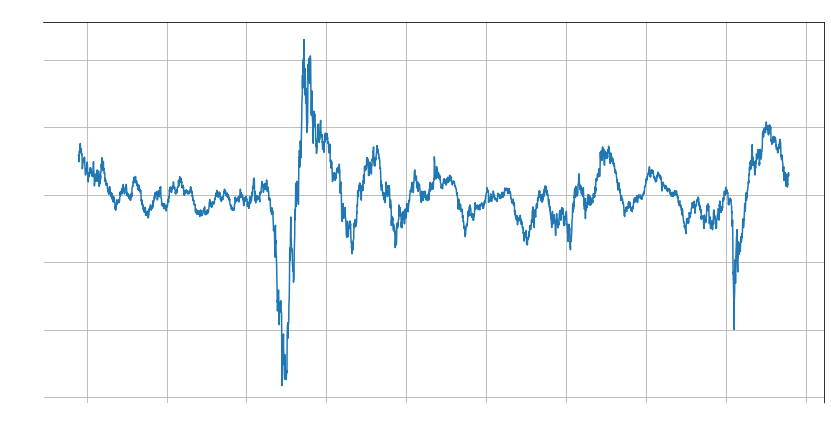

<Figure size 432x288 with 0 Axes>

In [126]:
real_rates_200z = real_rates_zscores[['Date','ten_200d_ma_dif_zscore']]
real_rates_200z = real_rates_200z.set_index('Date')
# real_rates_200z.plot(kind="line", figsize=(14,7), title="200day Real Rates Z scores",grid=True)

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot()
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.set_xlabel('Years')
ax.set_ylabel('200d MA Z-Score')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
# plt.figure(figsize=(14, 7), dpi=80)
plt.title("200day Real Rates Z scores",color='w')
plt.plot(real_rates_200z)
plt.grid()
plt.show()
plt.tight_layout()

In [116]:
treasury_df['two_ten'] = treasury_df['ten_yr'] - treasury_df['2 Yr']
treasury_df['mo3_ten'] = treasury_df['ten_yr'] - treasury_df['3 Mo']
treasury_df['five_thirty'] = treasury_df['30 Yr'] - treasury_df['5 Yr']

treasury_df['two_ten_chg'] = treasury_df.two_ten - treasury_df.two_ten.shift(-1)
treasury_df['mo3_ten_chg'] = treasury_df.mo3_ten - treasury_df.mo3_ten.shift(-1)
treasury_df['five_thirty_chg'] = treasury_df.five_thirty - treasury_df.five_thirty.shift(-1)

treasury_df['ten_20d_ma'] = treasury_df.ten_yr.rolling(20).mean()
treasury_df['ten_50d_ma'] = treasury_df.ten_yr.rolling(50).mean()
treasury_df['ten_200d_ma'] = treasury_df.ten_yr.rolling(200).mean()
treasury_df['ten_20d_ma_dif'] = (treasury_df['ten_yr'] - treasury_df['ten_20d_ma']) / treasury_df['ten_20d_ma']
treasury_df['ten_50d_ma_dif'] = (treasury_df['ten_yr'] - treasury_df['ten_50d_ma']) / treasury_df['ten_50d_ma']
treasury_df['ten_200d_ma_dif'] = (treasury_df['ten_yr'] - treasury_df['ten_200d_ma']) / treasury_df['ten_200d_ma']

treasury_chg_df = treasury_df[['Date','two_ten_chg','mo3_ten_chg','five_thirty_chg',
                               'ten_20d_ma_dif','ten_50d_ma_dif','ten_200d_ma_dif']]

treasury_summary_df = treasury_chg_df.agg(['mean','median','var','std','sem'])
# summary_agg = clean_df.groupby(['Drug_Regimen']).agg({'Tumor_Volume_mm3':['mean','median','var','std','sem']})
# summary_agg


# treasury_df.tail()
# treasury_chg_df.tail()
# treasury_summary_df.tail()

cols = list(treasury_chg_df.columns)
cols

for col in cols:
    treasury_chg_df[col + '_zscore'] = (treasury_chg_df[col] - (treasury_chg_df[col].mean()))\
        /treasury_chg_df[col].std(ddof=0)

treasury_zscores = treasury_chg_df[['Date','two_ten_chg_zscore','mo3_ten_chg_zscore',
                                    'five_thirty_chg_zscore','ten_20d_ma_dif_zscore',
                                    'ten_50d_ma_dif_zscore','ten_200d_ma_dif_zscore']]

treasury_zscores.to_csv('Output/treasury_zscores.csv')
treasury_zscores.tail()

<ipython-input-116-515999610fea>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treasury_chg_df[col + '_zscore'] = (treasury_chg_df[col] - (treasury_chg_df[col].mean()))\


,Date,two_ten_chg_zscore,mo3_ten_chg_zscore,five_thirty_chg_zscore,ten_20d_ma_dif_zscore,ten_50d_ma_dif_zscore,ten_200d_ma_dif_zscore
7910,2021-08-11,-0.27315,0.002249,-0.581618,1.454129,-0.349458,0.301935
7911,2021-08-12,1.93861,1.094004,1.486031,1.582767,-0.209822,0.336802
7912,2021-08-13,0.27979,0.470144,-0.581618,0.374008,-0.824564,-0.015522
7913,2021-08-16,0.55626,0.158214,0.599895,-0.212744,-1.062391,-0.172032
7914,2021-08-17,NaN,NaN,NaN,-0.238647,-1.006782,-0.181503
